In [34]:
# Useful starting lines
%matplotlib inline
import numpy as np
np.random.seed(42)
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Librairies are in. Now let's imoport the data


In [35]:
import pandas as pd
import numpy as np
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

print(data)

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]


In [36]:
X = data
y = target

print("Shape of the data sample matrix X:", X.shape)
#(475,13) : 475 lignes et 13 colonnes
#print(X[:,3]);

# remove categorical feature

X = np.delete(X, 3, axis=1) #on enleve la 3e colonne car que des 0
# on eleve le 3 sur l'axe 1 ( voir schéma cours avant)

# removing second mode

print("**")
ind = y<40 # tableau de meme dimension que y avec True si l'element < 40, false sinon
X = X[ind,:]
y = y[ind]




N = X.shape[0]
D = X.shape[1]
print("The number of data samples is N:", N)
print("The number of features is D:", D)


print("\nShape of the labels vector y:", y.shape)

print("\nFirst data sample in X:", X[0,:]) #intersection entre 1 ligne et toutes les colonnes -> 1ere ligne
print("First label in y:", y[0])



Shape of the data sample matrix X: (506, 13)
**
The number of data samples is N: 475
The number of features is D: 12

Shape of the labels vector y: (475,)

First data sample in X: [6.320e-03 1.800e+01 2.310e+00 5.380e-01 6.575e+00 6.520e+01 4.090e+00
 1.000e+00 2.960e+02 1.530e+01 3.969e+02 4.980e+00]
First label in y: 24.0


Let's set aside 80% of the data for training and 20% for testing. 


In [37]:
split_ratio = 0.8
print(X.shape)
# Step 1:
indices = np.arange(X.shape[0]) #tableau1D de 0 a 474

# Step 2:
np.random.shuffle(indices) #on melange

# Step 3:
X_train    = X[indices[0:int(N*split_ratio)],:] 
y_train    = y[indices[0:int(N*split_ratio)]] 
X_test     = X[indices[int(N*(split_ratio)):],:] 
y_test     = y[indices[int(N*(split_ratio)):]] 

(475, 12)


In [38]:
split_ratio = 0.8
#80% for the training et 20% pour l'entrainement.
#on a d'abord mélanger tous les indices , puis on a pris les 80 premiers %. les 20% pourcents sont laissés
# pour le test


# Step 1:
indices = np.arange(N)
#creer un tableau commencant a 0 jusqu'a N-1 : 474

np.random.shuffle(indices) #on melange aleatoirement


# Step 3:
X_train    = X[indices[0:int(N*split_ratio)] , :] 
y_train    = y[indices[0:int(N*split_ratio)]] 

print(int(N*split_ratio)) #380 : 80% de 474
#print(indices[0:int(N*split_ratio)] ) # les 380 premieres valeurs du tableau indices mélangé

print(X_train) # on a pris X[indices[0]], puis X[indices[1]]...X[indices[380]]
#il s'agit de tableau dans un tableau !


# Split the test data using the remaining indices!


X_test     = X[indices[int(N*split_ratio):],:]#YOUR CODE HERE
y_test     = y[indices[int(N*split_ratio):]] #YOUR CODE HERE

380
[[8.82600e-02 0.00000e+00 1.08100e+01 ... 1.92000e+01 3.83730e+02
  6.72000e+00]
 [3.84970e+00 0.00000e+00 1.81000e+01 ... 2.02000e+01 3.91340e+02
  1.32700e+01]
 [3.25430e-01 0.00000e+00 2.18900e+01 ... 2.12000e+01 3.96900e+02
  1.53900e+01]
 ...
 [1.49632e+00 0.00000e+00 1.95800e+01 ... 1.47000e+01 3.41600e+02
  1.32800e+01]
 [4.81213e+00 0.00000e+00 1.81000e+01 ... 2.02000e+01 2.55230e+02
  1.64200e+01]
 [4.64689e+00 0.00000e+00 1.81000e+01 ... 2.02000e+01 3.74680e+02
  1.16600e+01]]


In [39]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(380, 12)
(380,)
(95, 12)
(95,)


After, we normalize the data such that each feature has zero mean and unit standard deviation. (Since you have not seen this in the lectures yet, we have provided the code for you. 

Text(0.5, 1.0, 'Attribute $X_4$ vs Price $y$')

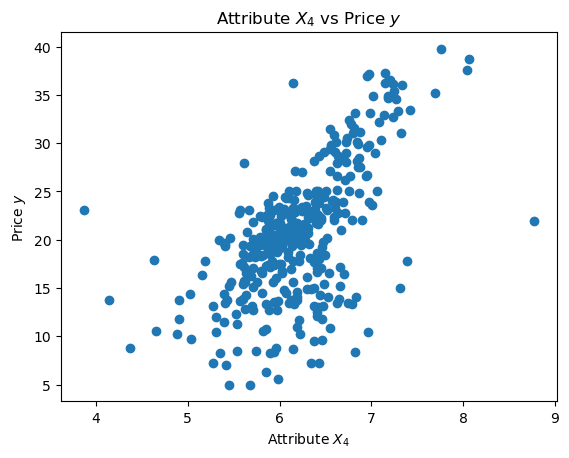

In [40]:
# Exploratory analysis of the data. Have a look at the distribution of prices vs features

feature =4
#print(X_train[:,feature]) # intersection entre toutes les lignes, et la colonne 4 --> colonne 4 soit average number of rooms per dwelling
plt.scatter(X_train[:,feature], y_train)
plt.xlabel(f"Attribute $X_{feature}$")
plt.ylabel("Price $y$")

plt.title(f"Attribute $X_{feature}$ vs Price $y$")

#forme linéaire
# les prix sont plafonnés par 40
#l'attribut 4 est le nombre de chambre par logement

# donc en traçant, on a une forme quasi linéaire

Text(0.5, 1.0, 'Attribute $X_11$ vs Price $y$')

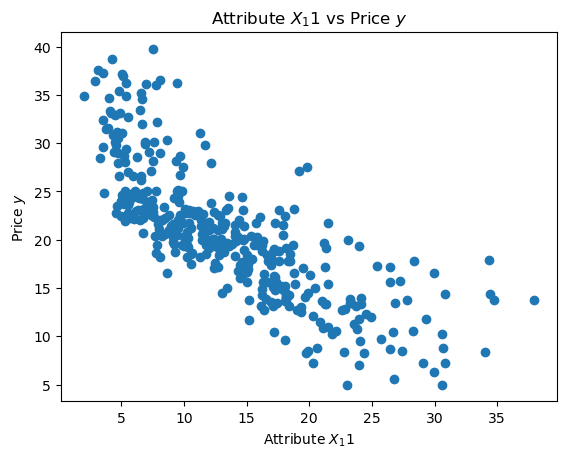

In [41]:
# Exploratory analysis of the data. Have a look at the distribution of prices vs features

feature =11
plt.scatter(X_train[:,feature], y_train) #on trace la 11e colonne en fonction du la donnée target (prix)
plt.xlabel(f"Attribute $X_{feature}$")
plt.ylabel("Price $y$")
plt.title(f"Attribute $X_{feature}$ vs Price $y$")
#negative correlation entre entrée et sortie

The relations between feature values and house prices differ across the different features. Some features (e.g. 4) are positively correlated with the house prices, some (e.g. 11) are negatively correlated. For many others a clear trend is hard to spot by mere inspection.




# 2.2 Closed-form solution for linear regression


The linear regression method has a closed form, analytical solution, as we have also seen in class.

$$ \mathbf{w^*} = (\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T\mathbf{y} $$


Now let's code the analytical solution in the function `get_w_analytical` and to obtain the weight parameters $\mathbf{w}$. Tip: You may want to use the function np.linalg.pinv. 

$$ (\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T $$ 

est de dimension (12,380) ici, donc en sortie, w* est bien un vecteur colonne de 12 

In [42]:
def get_w_analytical(X_train,y_train):
    """
    compute the weight parameters w
    """
        
    # compute w via the analytical solution
    # This is for you to implement in your project
    w = np.linalg.pinv(X_train) @ y_train## YOUR CODE HERE
    print("w vaut",w)
    print(w.shape) #vecteur 1 ligne de 12 colonnes
    return w

#normalement n nous avons en entrée un vecteur de taille 12 (vecteur colonne) donc w aussi

#C = A@B renvoie le produit matricielle
#np.linalg.pinv(X_train) renvoie 𝐗^T𝐗⁻1 * 𝐗^T

#pas besoin de preciser la transposé , le produit matricielle s'en charge ?
# w a donc 12 coefficients


To assess our method's performance, we'll be using the mean squared error (MSE). 

$$ MSE = \frac{1}{N}\sum_{i=1}^N (\hat{y}_i - y_i)^2$$

where our prediction $\hat{y}_i = \mathbf{x}_i^T \cdot \mathbf{w} $.



In [43]:

def get_loss(w, X_train, y_train,X_test,y_test):
    print("renvoie l'erreur quadratique moyenne")
    loss_train = (np.mean((y_train-X_train@w)**2))
    loss_test = (np.mean((y_test-X_test@w)**2))
    print("The training loss is {}. The test loss is {}.".format(loss_train, loss_test))

    return loss_test

# attention: en prenant yi=xi*w, on oublie l'ordonnée a l'origine (= bias term)

In [44]:
#Let's test our code!
w_ana = get_w_analytical(X_train,y_train)


get_loss(w_ana, X_train,y_train, X_test,y_test)

w vaut [-0.114356    0.03937632 -0.03856178  0.20920492  5.11753667 -0.03380415
 -0.62443395  0.09817067 -0.01104306 -0.20170145  0.01096571 -0.19387139]
(12,)
renvoie l'erreur quadratique moyenne
The training loss is 12.239353198960956. The test loss is 17.21840158753473.


17.21840158753473

The error of 400 is quite high! Note however that, in contrast to what we have seen in the lectures, we did not use any bias term $\text{w}^{(0)}$. Let's see whether we can reduce the error by including a bias term.

First, let's look more closely at what happens without a bias term. Formally, without a bias term, we are fitting a hyperplane that always passes through the origin. This is because our predictions can be expressed as
$$ \hat{y}_i = \text{w}^{(1)}x_i^{(1)} +  \text{w}^{(2)}x_i^{(2)} + ... + \text{w}^{(12)}x_i^{(12)} $$

or

$$ \hat{y}_i = \mathbf{x}_i^T \cdot \mathbf{w} $$ 

Therefore, when $\mathbf{x}_i=\mathbf{0}$, $\hat{y}_i= 0$, no matter what values $\mathbf{w}$ takes. That's not ideal!

Note: If you are confused about the transpose operation in $\hat{y}_i = \mathbf{x}_i^T \cdot \mathbf{w}$ above, here are the shapes of the matrices that are being multiplied:  
* $\mathbf{w}$ is DX1 
* $\mathbf{x}_i$ is DX1 (A reminder: The entire data $\mathbf{X}$ is NXD, but when we select a single data sample from it, we express it as a column vector!) 
* The result $\hat{y}_i$ is 1x1




**Introducing the bias term:**
        
It would be a lot nicer if our predicted hyperplane didn't always have to pass through the origin. In math words:

$$ \hat{y}_i = \text{w}^{(0)} + \text{w}^{(1)}x_i^{(1)} +  \text{w}^{(2)}x_i^{(2)} + ... + \text{w}^{(12)}x_i^{(12)} $$

Here, the $\text{w}^{(0)}$ is the y-intercept. When $\mathbf{x}_i=\mathbf{0}$, $y_i= \text{w}^{(0)}$. Neat!


To handle this, we can add a column of 1s as a feature in our data $\mathbf{X}$. This way, we could just say that the last feature $x_i^{(0)} = 1$ and

$$ \hat{y}_i = \text{w}^{(0)}\cdot 1 + \text{w}^{(1)}x_i^{(1)} +  \text{w}^{(2)}x_i^{(2)} + ... + \text{w}^{(12)}x_i^{(12)} $$

$$ \hat{y}_i = \text{w}^{(0)}x_i^{(0)} + \text{w}^{(1)}x_i^{(1)} +  \text{w}^{(2)}x_i^{(2)} + ... + \text{w}^{(12)}x_i^{(12)} $$

$$ \hat{y}_i = \mathbf{x}_i^T \cdot \mathbf{w} $$ 









In [59]:
def append_bias_term(X_train):
    #prend un tableau de 380 lignes et 12 colonnes et u ajoute une colonne de 1
    #tel que chaque ligne devient de taille 13
    #chaque ligne xi devient xi,1

    # cree un tableau de 380 lignes et 1 colonne rempli de 1

    ones_column = np.ones([X_train.shape[0],1])# 380 lignes et 1 colonne

    #concatene le tableau de 380 lignes et 1 colonne avec le tableau de 380 lignes et 12 colonnes
    #axis=1 : on concatene sur les colonnes
    X_train_bias = np.concatenate((X_train,ones_column),axis=1)
    return X_train_bias

In [60]:
print(" Avant : " , X_train.shape)

X_train_bias = append_bias_term(X_train)
X_test_bias = append_bias_term(X_test)

print(" Apres : " ,X_train_bias.shape)


 Avant :  (380, 12)
(380, 1)
(95, 1)
 Apres :  (380, 13)


In [54]:
print(X_train_bias)

[[8.82600e-02 0.00000e+00 1.08100e+01 ... 3.83730e+02 6.72000e+00
  1.00000e+00]
 [3.84970e+00 0.00000e+00 1.81000e+01 ... 3.91340e+02 1.32700e+01
  1.00000e+00]
 [3.25430e-01 0.00000e+00 2.18900e+01 ... 3.96900e+02 1.53900e+01
  1.00000e+00]
 ...
 [1.49632e+00 0.00000e+00 1.95800e+01 ... 3.41600e+02 1.32800e+01
  1.00000e+00]
 [4.81213e+00 0.00000e+00 1.81000e+01 ... 2.55230e+02 1.64200e+01
  1.00000e+00]
 [4.64689e+00 0.00000e+00 1.81000e+01 ... 3.74680e+02 1.16600e+01
  1.00000e+00]]


In [61]:
w_ana = get_w_analytical(X_train_bias,y_train)

get_loss(w_ana, X_train_bias,y_train, X_test_bias,y_test)

w vaut [-1.21409408e-01  4.31586499e-02 -1.20077171e-04 -1.40580181e+01
  2.44589754e+00 -2.20905229e-02 -1.17319528e+00  2.52318520e-01
 -1.46482302e-02 -7.05702315e-01  5.18519789e-03 -3.63293104e-01
  3.91883068e+01]
(13,)
renvoie l'erreur quadratique moyenne
The training loss is 9.927412041848186. The test loss is 13.836705101434681.


13.836705101434681

# Using sklearn

In [63]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Step 1: Create a linear regression model using sklearn
model = LinearRegression()

# Step 2: Train the model using the training sets
model.fit(X_train,y_train)

# Step 3: Make predictions using the testing set
y_hat = model.predict(X_test)



# The coefficients : w1,w2,w3,w4,w5,w6,w7,w8,w9,w10,w11,w12
print('Coefficients: ', model.coef_)


print('MSE of sklearn linear regression model on test data: ' , metrics.mean_squared_error(y_test,y_hat))

Coefficients:  [-1.21409408e-01  4.31586499e-02 -1.20077171e-04 -1.40580181e+01
  2.44589754e+00 -2.20905229e-02 -1.17319528e+00  2.52318520e-01
 -1.46482302e-02 -7.05702315e-01  5.18519789e-03 -3.63293104e-01]
MSE of sklearn linear regression model on test data:  13.836705101435026
